This notebook contains analysis and plot generation of the series of 125 parameter-study runs in which weathering is switched on, and the uplifted material is rock.

Start by reading data from csv file.

In [2]:
import csv
import numpy as np


N = 125  # number of runs

# Create arrays
run_number = np.zeros(N, dtype=int)
dprime = np.zeros(N)
wprime = np.zeros(N)
w = np.zeros(N)
tau = np.zeros(N)
d = np.zeros(N)
max_ht = np.zeros(N)
mean_ht = np.zeros(N)
mean_slope = np.zeros(N)
mean_soil = np.zeros(N)
frac_cover = np.zeros(N)
num_air_faces = np.zeros(N)
num_soil_air_faces = np.zeros(N)
num_rock_air_faces = np.zeros(N)

i = -1
with open('grain_hill_wxing_results.csv', 'rb') as csvfile:
    myreader = csv.reader(csvfile)
    for row in myreader:
        if i > -1:
            run_number[i] = int(row[0])
            dprime[i] = float(row[1])
            wprime[i] = float(row[2])
            w[i] = float(row[3])
            tau[i] = float(row[4])
            d[i] = float(row[5])
            max_ht[i] = float(row[6])
            mean_ht[i] = float(row[7])
            mean_slope[i] = float(row[8])
            mean_soil[i] = float(row[9])
            frac_cover[i] = float(row[10])
            num_air_faces[i] = float(row[11])
            num_soil_air_faces[i] = float(row[12])
            num_rock_air_faces[i] = float(row[13])
        i += 1
csvfile.close()

In [3]:
# Define discrete values for d', w'
dpvals = np.array([0.1, 1.0, 10.0, 100.0, 1000.0])
wpvals = np.array([0.4, 1.265, 4.0, 12.649, 40.0])

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

psyms = ['.', '+', '^', 'x', '*']
#psyms = ['k.', 'k+', 'k^', 'kx', 'k*']

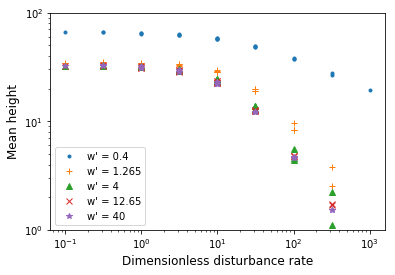

In [5]:
# Plot 1: mean height as function of d', grouped by w'
rounded_wp = np.round(wprime, 3)
symnum = 0
for wp in wpvals:
    pts = np.where(rounded_wp == wp)[0]
    plt.loglog(dprime[pts], mean_ht[pts], psyms[symnum])
    symnum += 1
plt.xlabel('Dimensionless disturbance rate', {'fontsize' : 12})
plt.ylabel('Mean height', {'fontsize' : 12})
plt.legend(["w' = 0.4", "w' = 1.265", "w' = 4", "w' = 12.65", "w' = 40"])
plt.ylim([1, 100])
plt.savefig('wx_mean_ht_vs_dist_rate.pdf')

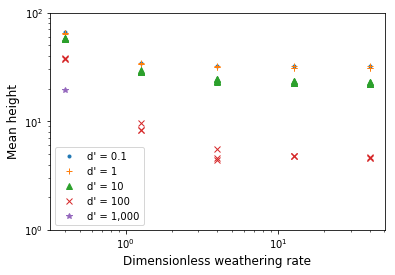

In [6]:
# Plot 2: mean height as function of w', grouped by d'
rounded_dp = np.round(dprime, 3)
symnum = 0
for dp in dpvals:
    pts = np.where(rounded_dp == dp)[0]
    plt.loglog(wprime[pts], mean_ht[pts], psyms[symnum])
    symnum += 1
plt.xlabel('Dimensionless weathering rate', {'fontsize' : 12})
plt.ylabel('Mean height', {'fontsize' : 12})
plt.legend(["d' = 0.1", "d' = 1", "d' = 10", "d' = 100", "d' = 1,000"])
plt.ylim([1, 100])
plt.savefig('wx_mean_ht_vs_weath_rate.pdf')

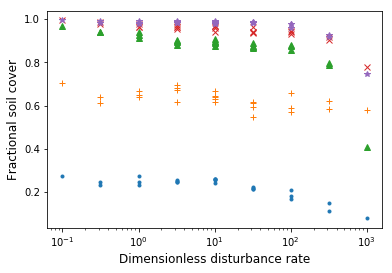

In [7]:
# Plot 3: soil cover as function of d', grouped by w'
symnum = 0
for wp in wpvals:
    pts = np.where(rounded_wp == wp)[0]
    plt.semilogx(dprime[pts], frac_cover[pts], psyms[symnum])
    symnum += 1
plt.xlabel('Dimensionless disturbance rate', {'fontsize' : 12})
plt.ylabel('Fractional soil cover', {'fontsize' : 12})
#plt.legend(["w' = 0.4", "w' = 1.265", "w' = 4", "w' = 12.65", "w' = 40"])
#plt.ylim([1, 100])
plt.savefig('wx_frac_cover_vs_dist_rate.pdf')

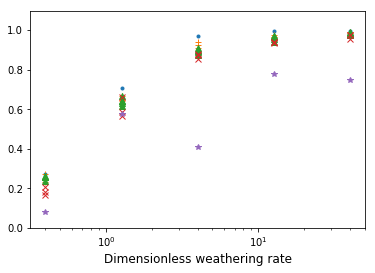

In [8]:
# Plot 4: soil cover as function of w', grouped by d'
symnum = 0
for dp in dpvals:
    pts = np.where(rounded_dp == dp)[0]
    plt.semilogx(wprime[pts], frac_cover[pts], psyms[symnum])
    symnum += 1
plt.xlabel('Dimensionless weathering rate', {'fontsize' : 12})
#plt.ylabel('Fractional soil cover', {'fontsize' : 12})
#plt.legend(["w' = 0.4", "w' = 1.265", "w' = 4", "w' = 12.65", "w' = 40"])
plt.ylim([0, 1.1])
plt.savefig('wx_frac_cover_vs_weath_rate.pdf')

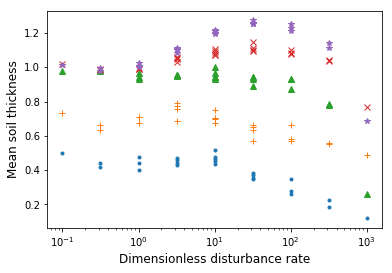

In [9]:
# Plot 5: soil thickness as function of d', grouped by w'
symnum = 0
for wp in wpvals:
    pts = np.where(rounded_wp == wp)[0]
    plt.semilogx(dprime[pts], mean_soil[pts], psyms[symnum])
    symnum += 1
plt.xlabel('Dimensionless disturbance rate', {'fontsize' : 12})
plt.ylabel('Mean soil thickness', {'fontsize' : 12})
#plt.legend(["w' = 0.4", "w' = 1.265", "w' = 4", "w' = 12.65", "w' = 40"])
#plt.ylim([1, 100])
plt.savefig('wx_soil_thick_vs_dist_rate.pdf')

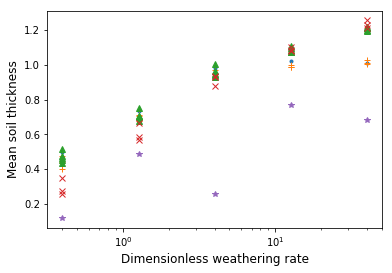

In [10]:
# Plot 6: soil thickness as function of w', grouped by d'
symnum = 0
for dp in dpvals:
    pts = np.where(rounded_dp == dp)[0]
    plt.semilogx(wprime[pts], mean_soil[pts], psyms[symnum])
    symnum += 1
plt.xlabel('Dimensionless weathering rate', {'fontsize' : 12})
plt.ylabel('Mean soil thickness', {'fontsize' : 12})
#plt.legend(["w' = 0.4", "w' = 1.265", "w' = 4", "w' = 12.65", "w' = 40"])
#plt.ylim([1, 100])
plt.savefig('wx_soil_thick_vs_weath_rate.pdf')

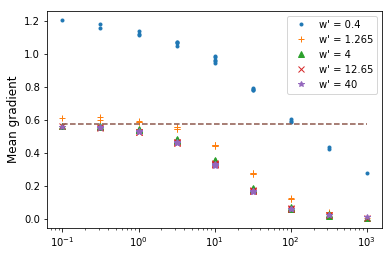

In [11]:
# Plot 7: mean gradient as function of d', grouped by w'
symnum = 0
for wp in wpvals:
    pts = np.where(rounded_wp == wp)[0]
    plt.semilogx(dprime[pts], mean_slope[pts], psyms[symnum])
    symnum += 1
plt.plot([0.1, 1000], [np.tan(30.0*np.pi/180.0), np.tan(30.0*np.pi/180.0)], '--')
#plt.xlabel('Dimensionless disturbance rate', {'fontsize' : 12})
plt.ylabel('Mean gradient', {'fontsize' : 12})
plt.legend(["w' = 0.4", "w' = 1.265", "w' = 4", "w' = 12.65", "w' = 40"])
#plt.ylim([1, 100])
plt.savefig('wx_gradient_vs_dist_rate.pdf')

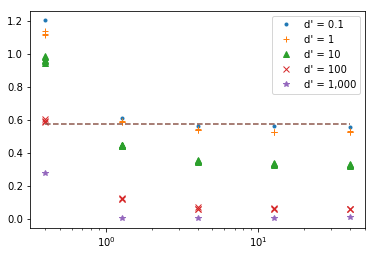

In [12]:
# Plot 8: mean gradient as function of w', grouped by d'
symnum = 0
for dp in dpvals:
    pts = np.where(rounded_dp == dp)[0]
    plt.semilogx(wprime[pts], mean_slope[pts], psyms[symnum])
    symnum += 1
plt.plot([0.4, 40], [np.tan(30.0*np.pi/180.0), np.tan(30.0*np.pi/180.0)], '--')
#plt.xlabel('Dimensionless weathering rate', {'fontsize' : 12})
#plt.ylabel('Mean gradient', {'fontsize' : 12})
plt.legend(["d' = 0.1", "d' = 1", "d' = 10", "d' = 100", "d' = 1,000"])
#plt.ylim([1, 100])
plt.savefig('wx_gradient_vs_weath_rate.pdf')

### A note on the geometry

The cross-sectional area uplift rate is the area of one cell, $A$, times the number of cells wide minus one (so, between the centers of each of the two lower-corner boundary cells), divided by $\tau$.

$a_{in} = A(N_C-1)/\tau$

The area weathering rate is the number of exposed faces times the area of a cell times the weathering rate:

$a_{out} = A N_{ra} w$

Equilibrium implies:

$1/\tau = N_{ra} w / (N_C - 1)$

In [15]:
# Now, let's look at the relationship between observed and predicted weathering rate. 
# The predicted weathering rate, in this case, is the weathering rate parameter times (number of rock-air faces /
# total number of solid-air faces)
pred_wx_rate = 1.0 / tau
estd_wx_rate = (num_rock_air_faces / 255.) * w

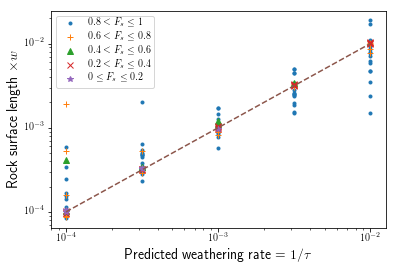

In [16]:
#few_faces = np.where(num_rock_air_faces < 25)[0]
#many_faces = np.where(num_rock_air_faces >= 25)[0]
#hge4 = np.where(max_ht >= 4)[0]
#hlt4 = np.where(max_ht < 4)[0]
#most = np.where(np.logical_and(max_ht >= 4, num_rock_air_faces >=25))[0]
plt.rc('text', usetex=True)
i = 0
for q in np.arange(0.8, -0.2, -0.2):
    idx = np.where(np.logical_and(frac_cover >= q, frac_cover <= (q + 0.2)))[0]
    plt.loglog(pred_wx_rate[idx], estd_wx_rate[idx], psyms[i])
    i += 1
plt.plot([1.0e-4, 1.0e-2], [1.0e-4, 1.0e-2], '--')
plt.xlabel(r'Predicted weathering rate = $1 / \tau$', {'fontsize' : 14})
plt.ylabel(r'Rock surface length $\times w$', {'fontsize' : 14})
plt.legend((r'$0.8 < F_s \le 1$', 
            r'$0.6 < F_s \le 0.8$',
            r'$0.4 < F_s \le 0.6$',
            r'$0.2 < F_s \le 0.4$',
            r'$0 \le F_s \le 0.2$'))
plt.savefig('wxing_vs_uplift.pdf')

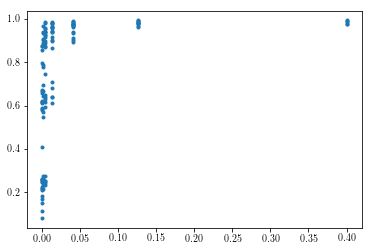

In [18]:
plt.plot(w, frac_cover, '.')

In [19]:
np.amin(frac_cover)

0.079945798999999998

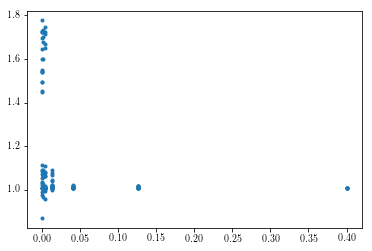

In [24]:
plt.plot(w, num_air_faces / 508.0, '.')

In [26]:
np.argmin(num_air_faces)

74

In [27]:
mean_ht[74]

0.15612648200000001

In [28]:
num_rock_air_faces[74]

262.0

In [29]:
np.amin(num_soil_air_faces)

59.0